# IGRINS CA1 demo

Here we demonstrate the diffraction theory of CA-1, the IGRINS immersion grating.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format='retina'

### Fixed physical properties

In [2]:
sigma = 27.36 # micron

In [3]:
groove_top_width = 9.95 # micron

In [4]:
blaze_angle_radians = np.arctan(3) # radians
blaze_angle_degrees = np.degrees(blaze_angle_radians)
blaze_angle_degrees

71.56505117707799

Assume testing in back-surface reflection in visible light!

In [5]:
wavelength_micron = 0.632 # micron

In [6]:
beam_size_mm = 0.5 # mm

### Compute the diffraction from a mirror

The width of the diffraction peak depends on the size of the mirror.

In [7]:
beam_size_radians = np.arcsin(wavelength_micron / (beam_size_mm * 1000.0))
beam_size_degrees = np.degrees(beam_size_radians)
beam_size_degrees

0.07242188458923733

### Set the angular sampling

We want a number that has about 10 steps per beamsize.

In [8]:
degrees_per_step = 0.002 # degrees

In [9]:
angular_grid_degrees = np.arange(-90, 90, degrees_per_step)
angular_grid_radians = np.radians(angular_grid_degrees)

In [10]:
n_steps = len(angular_grid_degrees)
n_steps

90000

### Visualize diffraction from the mirror
The mirror looks just like a single slit.

$I(\theta)/I_0 = \operatorname{sinc}^2 \left[ \frac{d \pi}{\lambda} (\sin\theta)\right]$


In [11]:
rhs_argument = (beam_size_mm*1000.0)*np.pi/(wavelength_micron)*np.sin(angular_grid_radians)

In [12]:
rhs = np.sinc(rhs_argument)**2

In [13]:
mirror_flux = rhs

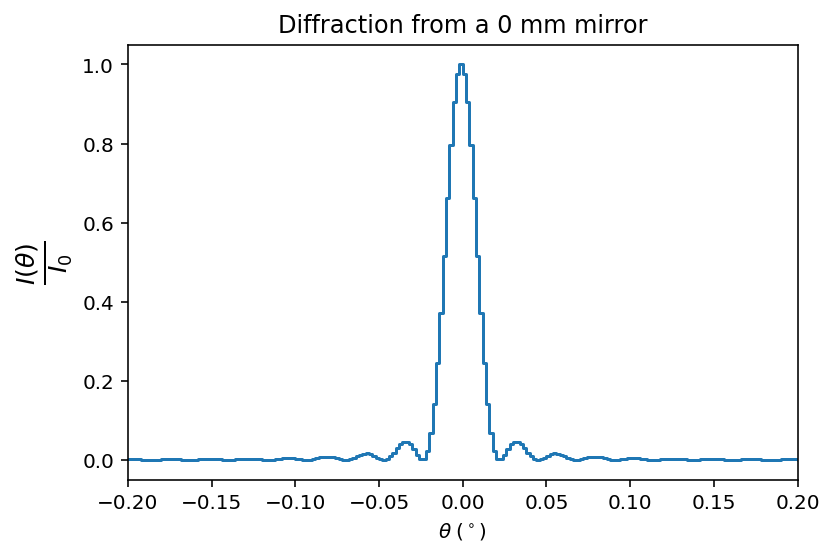

In [14]:
plt.step(angular_grid_degrees, mirror_flux)
plt.xlim(-0.2, 0.2);
plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0}$', fontsize=18)
plt.title('Diffraction from a {:.0f} mm mirror'.format(beam_size_mm) );

### Calculate the groove-top diffraction

We will assume that the grating is just a series of slits and voids (ignore the Si facet for now).

Rather than calculate which diffraction orders are physically possible, we will simply guess that there are fewer than 50 diffraction orders.  If your number of actual orders is larger than this number you will have to change update the line below.

In [15]:
max_m = 50

In [16]:
m_vector = np.arange(-max_m, max_m+1, 1)

Set the angle-of-incidence.  For now just assume normal incidence.

In [17]:
theta_i = 0.0

Now we compute the angles of the peak of diffraction for the input wavelength:

In [18]:
theta_m_radians = np.arcsin(m_vector*(wavelength_micron)/sigma)

/var/folders/gb/yvbtr8b57pd1nzzxk3t_zwfsxgvdgb/T/ipykernel_24943/1838490870.py:1: RuntimeWarning: invalid value encountered in arcsin
  theta_m_radians = np.arcsin(m_vector*(wavelength_micron)/sigma)


The locations that are `NaN` indicate there is no physical order there and therefore indicates the largest realized diffraction order:

In [19]:
finite_mask = np.isfinite(theta_m_radians)

In [20]:
np.max(m_vector[finite_mask])

43

The largest diffraction order at zero incidence, in immersion is 148.  

### Visualize the unblazed diffraction from all of these orders

Each order has a mirror-like diffraction centered on its $\theta_m$, calculated above.

In [21]:
theta_m_radians.shape

(101,)

## Key idea:

The $\theta_m$ vector is $101 \times 1$, it has to become a column vector ($1 \times 101$) to make the [numpy array broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html) work out:

In [22]:
theta_m_column = theta_m_radians[np.newaxis, :]
theta_m_column.shape

(1, 101)

This will produce a matrix of size $n_{steps}\times n_{m}$, which could exhaust your computer RAM, depending on the sizes of those vectors.

In [23]:
rhs_argument = ((beam_size_mm*1000.0)*np.pi/(wavelength_micron)*
                np.sin(angular_grid_radians[:, np.newaxis]-theta_m_column))

In [24]:
rhs = np.nan_to_num(np.sinc(rhs_argument)**2, nan=0.0)

In [25]:
unblazed_groove_top_diffraction = np.sum(rhs, axis=1)

### Visualize the *blazed* diffraction from all of these orders

Each order has a mirror-like diffraction centered on its $\theta_m$, calculated above.

In [26]:
blaze_modulation = np.sinc((groove_top_width*np.pi/(wavelength_micron)*
                np.sin(angular_grid_radians)))**2

In [27]:
blazed_groove_top_diffraction = blaze_modulation * unblazed_groove_top_diffraction

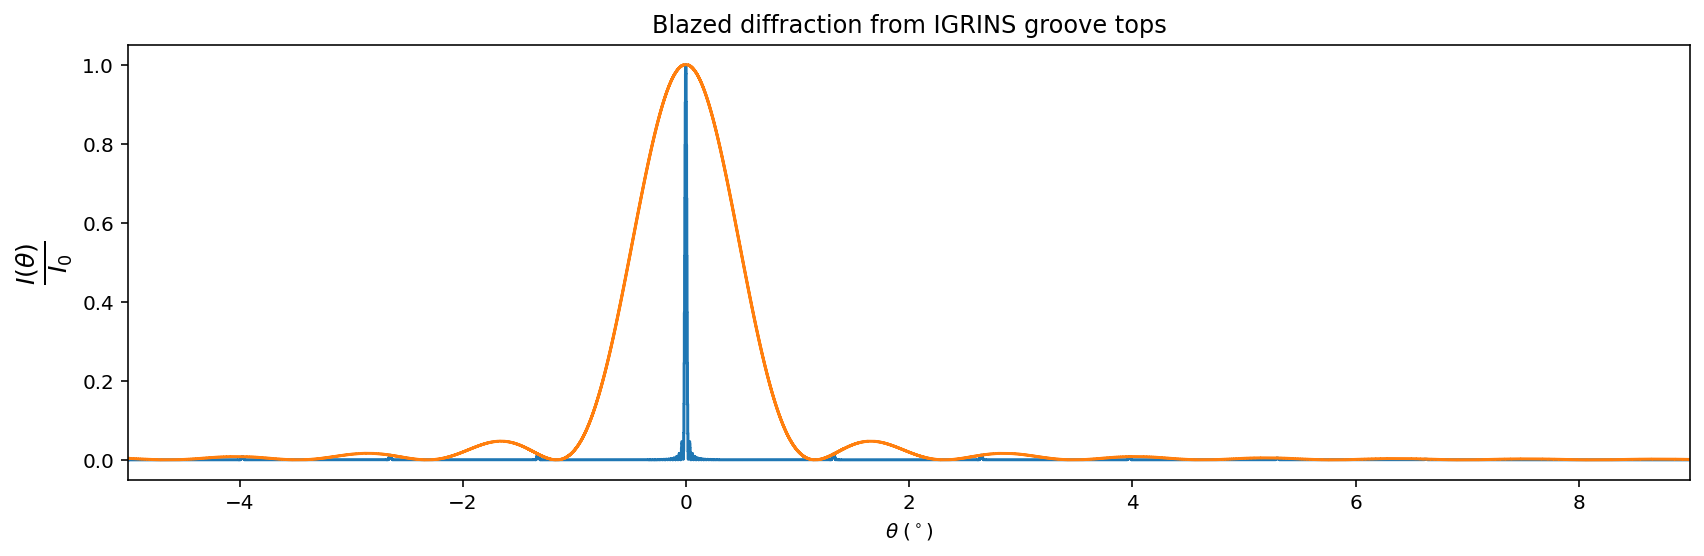

In [28]:
plt.figure(figsize=(14, 4))
plt.step(angular_grid_degrees, blazed_groove_top_diffraction)
plt.step(angular_grid_degrees, blaze_modulation)
plt.xlim(-5, 9)
plt.xlabel(r'$\theta \; (^\circ)$')
plt.ylabel(r'$\frac{I(\theta)}{I_0}$', fontsize=18)
plt.title('Blazed diffraction from IGRINS groove tops'.format(beam_size_mm) );

Yay!